In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [12]:
df = pd.read_csv("data/results_rq1b.csv")

In [13]:
title_mapping = {
    'direct_deps_bloated_count': 'Number of dependencies',
    'direct_deps_bloated_loc': 'Size of dependencies (LoC)',
    'direct_files_bloated_count': 'Number of files',
    'direct_files_bloated_loc': 'Size of files (LoC)',
    'direct_functions_bloated_count': 'Number of functions',
    'direct_functions_bloated_loc': 'Size of functions(LoC)'
}


In [14]:
column_mapping = {
    'product': 'product',
    'bloated_deps_count_1': 'direct_deps_bloated_count',
    'bloated_deps_loc_1': 'direct_deps_bloated_loc',
    'bloated_files_count_1': 'direct_files_bloated_count',
    'bloated_files_loc_1': 'direct_files_bloated_loc',
    'bloated_functions_count_1': 'direct_functions_bloated_count',
    'bloated_functions_loc_1': 'direct_functions_bloated_loc',
    'used_direct_deps_count_1': 'direct_deps_used_count',
    'used_direct_deps_loc_1': 'direct_deps_used_loc',
    'used_direct_files_count_1': 'direct_files_used_count',
    'used_direct_files_loc_1': 'direct_files_used_loc',
    'used_direct_functions_count_1': 'direct_functions_used_count',
    'used_direct_functions_loc_1': 'direct_functions_used_loc',
    'transitive_bloated_dependencies_count': 'transitive_deps_bloated_count',
    'transitive_bloated_dependencies_loc': 'transitive_deps_bloated_loc',
    'transitive_bloated_files_count': 'transitive_files_bloated_count',
    'transitive_bloated_files_loc': 'transitive_files_bloated_loc',
    'transitive_bloated_functions_count': 'transitive_functions_bloated_count',
    'transitive_bloated_functions_loc': 'transitive_functions_bloated_loc',
    'transitive_used_dependencies_count': 'transitive_deps_used_count',
    'transitive_used_dependencies_loc': 'transitive_deps_used_loc',
    'transitive_used_files_count': 'transitive_files_used_count',
    'transitive_used_files_loc': 'transitive_files_used_loc',
    'transitive_used_functions_count': 'transitive_functions_used_count',
    'transitive_used_functions_loc': 'transitive_functions_used_loc',
}


In [15]:
df = df.rename(columns=column_mapping)


In [16]:
df = df[list(column_mapping.values())]


In [17]:
# df.to_csv("a.csv", index=False)

In [18]:
df

,product,direct_deps_bloated_count,direct_deps_bloated_loc,direct_files_bloated_count,direct_files_bloated_loc,direct_functions_bloated_count,direct_functions_bloated_loc,direct_deps_used_count,direct_deps_used_loc,direct_files_used_count,direct_files_used_loc,direct_functions_used_count,direct_functions_used_loc,transitive_deps_bloated_count,transitive_deps_bloated_loc,transitive_files_bloated_count,transitive_files_bloated_loc,transitive_functions_bloated_count,transitive_functions_bloated_loc,transitive_deps_used_count,transitive_deps_used_loc,transitive_files_used_count,transitive_files_used_loc,transitive_functions_used_count,transitive_functions_used_loc
0,mozillasecurity/grizzly,0,0,133,18502,1751,21983,8,42239,60,23737,378,8631,6,25649,117,51986,2835,44202,6,44395,30,18058,240,4284
1,mozillasecurity/ffpuppet,0,0,2,165,457,5750,2,10485,11,10320,107,1267,0,0,0,0,0,0,0,0,0,0,0,0
2,mozillasecurity/funfuzz,0,0,391,112925,5316,91953,3,122886,13,9961,36,1065,3,16187,53,26200,644,18267,1,11176,2,1163,3,77
3,buckket/twtxt,0,0,63,21223,1921,24813,4,39419,21,18196,136,3406,6,6760,45,19515,665,16693,3,18252,7,5497,36,798
4,simetenn/uncertainpy,0,0,290,108094,2832,45307,8,131991,79,23897,280,5887,13,46265,1328,643170,24581,541458,8,723555,111,126650,646,25277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,pymeasure/pymeasure,0,0,640,200680,13658,263980,6,413793,224,213113,1864,47533,3,4097,46,12677,578,6135,2,10252,2,1672,30,982
1062,pydata/pandas-datareader,0,0,191,53432,4905,105197,3,173693,85,120261,1067,31961,4,5752,308,135202,4709,116475,5,166789,32,37339,163,5828
1063,pydata/patsy,0,0,204,86888,3689,92382,2,134983,35,48095,152,6207,0,0,0,0,0,0,0,0,0,0,0,0
1064,pydata/xarray,0,0,364,136188,8319,195015,3,299196,118,163008,1060,35614,2,1025,44,9006,409,3684,2,10252,3,2271,37,1272


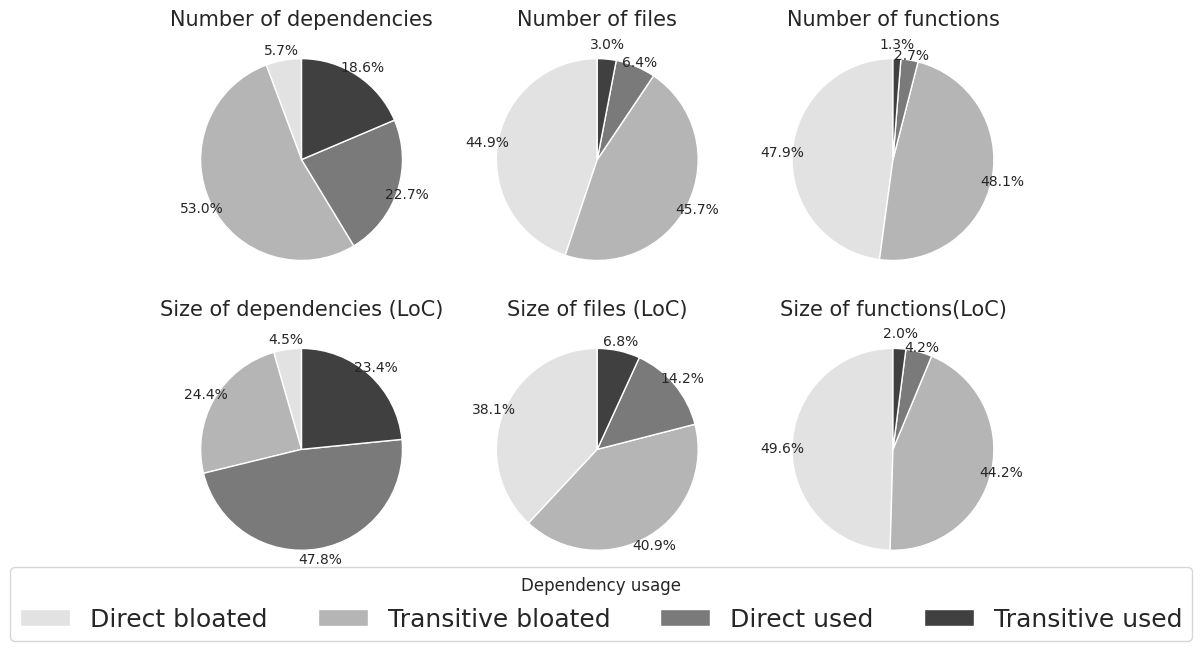

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
ax_iter = iter(axes.flatten())

# New metrics mapping reordered for the desired sequence
metrics_mapping = {
    'direct_deps_bloated_count': ['transitive_deps_bloated_count', 'direct_deps_used_count', 'transitive_deps_used_count'],
    'direct_files_bloated_count': ['transitive_files_bloated_count', 'direct_files_used_count', 'transitive_files_used_count'],
    'direct_functions_bloated_count': ['transitive_functions_bloated_count', 'direct_functions_used_count', 'transitive_functions_used_count'],
    'direct_deps_bloated_loc': ['transitive_deps_bloated_loc', 'direct_deps_used_loc', 'transitive_deps_used_loc'],
    'direct_files_bloated_loc': ['transitive_files_bloated_loc', 'direct_files_used_loc', 'transitive_files_used_loc'],
    'direct_functions_bloated_loc': ['transitive_functions_bloated_loc', 'direct_functions_used_loc', 'transitive_functions_used_loc'],
}


labels = ['Direct bloated', 'Transitive bloated', 'Direct used', 'Transitive used']

for direct_metric, other_metrics in metrics_mapping.items():
    ax = next(ax_iter)

    # Calculate values for all 4 categories
    direct_bloated_value = df[direct_metric].sum()
    transitive_bloated_value = df[other_metrics[0]].sum()
    direct_used_value = df[other_metrics[1]].sum()
    transitive_used_value = df[other_metrics[2]].sum()
    
    values = [direct_bloated_value, transitive_bloated_value, direct_used_value, transitive_used_value]
    
    wedges, texts, autotexts = ax.pie(values, autopct='%1.1f%%', startangle=90, pctdistance=1.1,
                                     colors=sns.color_palette("Greys", 4))

    # Set white edge color for each wedge
    for wedge in wedges:
        wedge.set_edgecolor('white')
    for i in range(len(autotexts) - 1):
        x1, y1 = autotexts[i].get_position()
        x2, y2 = autotexts[i+1].get_position()
        if abs(y2 - y1) < 0.1:  # Check if y-coordinates are close
            if y1 < y2:
                y1_new = y1 - 0.05
                y2_new = y2 + 0.05
            else:
                y1_new = y1 + 0.05
                y2_new = y2 - 0.05
            autotexts[i].set(y=y1_new)
            autotexts[i+1].set(y=y2_new)
    
    # Adjust font size for labels and autopct
    for text in texts + autotexts:
        text.set(size=10)

    ax.set_title(title_mapping[direct_metric], fontsize=15)

fig.legend(wedges, labels, title="Dependency usage", loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

plt.tight_layout()
fig.savefig("figures/rq1b.pdf", format="pdf", bbox_inches='tight')


In [20]:
df.direct_deps_bloated_count.sum()

987